In [346]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import sys
print(sys.executable)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

/home/kwamena/miniconda3/bin/python


In [347]:
# Load your dataset

In [348]:
df = pd.read_csv('/home/kwamena/Desktop/desk/Fante/toxicity_dataset.csv')

In [349]:
df.isnull().sum() #to check if any there is null value with our data

comment    0
label      0
dtype: int64

In [350]:
df.shape

(2262, 2)

In [351]:
df['label'].value_counts() # I created same number of dataset for both toxic and non-toxic

label
1    1234
0    1028
Name: count, dtype: int64

In [352]:
df.sample(10)

,comment,label
315,evilbitch,1
265,dago,1
1924,maybe,0
1280,easy,0
1574,furthermore,0
356,fecker,1
1082,vajayjay,1
2208,egbɔdɔdɔ,1
783,nigg3rs,1
1042,tittie5,1


In [353]:
# Determine class weights to handle imbalance
class_weights = 'balanced'

In [354]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [355]:
# Tokenization and Padding
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])

In [356]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=0, stratify=df['label'])


In [357]:
# Model definition
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [358]:
# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [359]:
# will create the model for the prediction in the streamlit app
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))

model = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

### will read in binary mode

In [360]:

# Evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 0.5143487858719646


In [361]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65       206
           1       1.00      0.11      0.20       247

    accuracy                           0.51       453
   macro avg       0.74      0.55      0.42       453
weighted avg       0.77      0.51      0.40       453



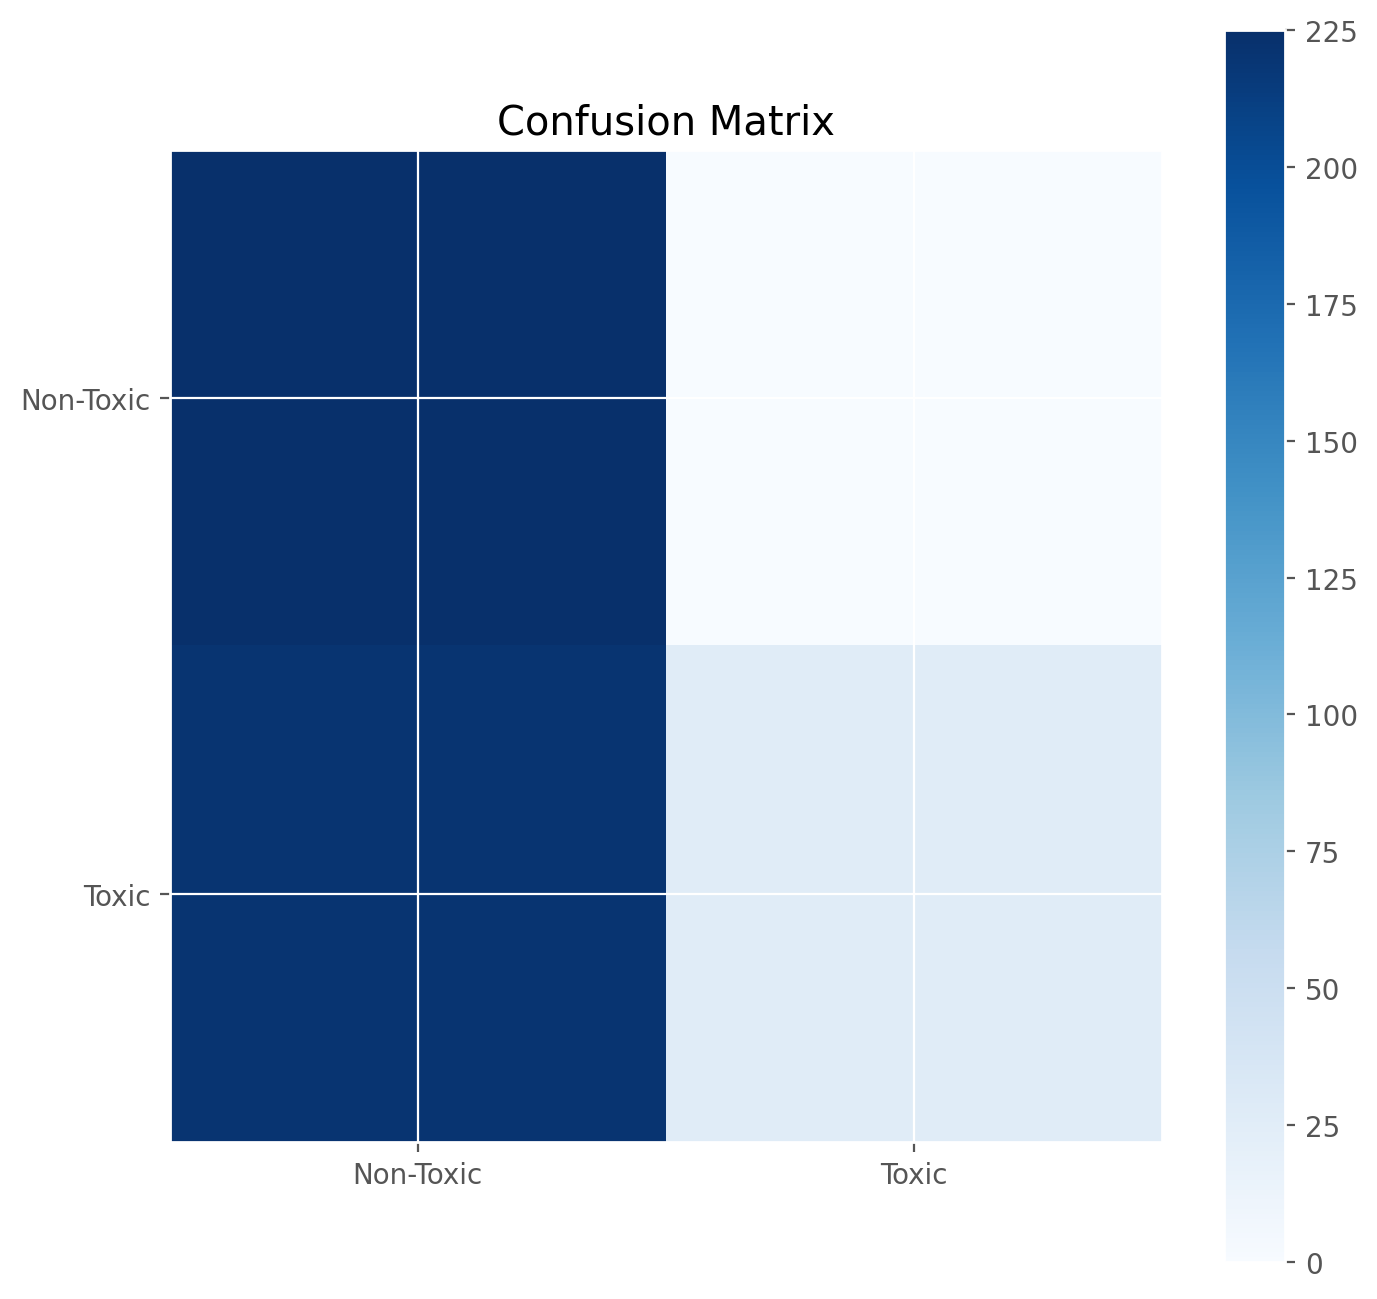

In [345]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='None')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.yticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.show()
